<a href="https://colab.research.google.com/github/MelikeBadem/Forecast-WeatherML/blob/main/forecastMl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Veri dosyasını yükleme
df = pd.read_csv("guncellenmis_hava_durumu.csv")

# Özellik ve hedef ayrımı
X = df.drop(["Sıcaklık", "Tarih", "Hava Durumu Özeti", "Zaman Dilimi", "Non-Night"], axis=1)  # Hedef değişken dışındaki sütunlar
y = df["Sıcaklık"]

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Linear Regression Modeli
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("\nLinear Regression Model")
print("Mean Squared Error (MSE):", mse_linear)
print("Mean Absolute Error (MAE):", mae_linear)
print(f"Modelin Doğruluğu (R²): {r2_linear * 100:.2f}%")



Linear Regression Model
Mean Squared Error (MSE): 1.9484775727764185
Mean Absolute Error (MAE): 1.0349981558962869
Modelin Doğruluğu (R²): 96.98%


In [4]:
# Random Forest Modeli
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Model")
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print(f"Modelin Doğruluğu (R²): {r2_rf * 100:.2f}%")


Random Forest Model
Mean Squared Error (MSE): 1.3103309399109044
Mean Absolute Error (MAE): 0.7573670018317521
Modelin Doğruluğu (R²): 97.97%


In [5]:
from sklearn.linear_model import PassiveAggressiveRegressor

# Passive Aggressive Regressor modeli
pa_model = PassiveAggressiveRegressor(max_iter=100, random_state=42, tol=1e-3)
pa_model.fit(X_train, y_train)
y_pred_pa = pa_model.predict(X_test)

# Performans ölçümleri
mse_pa = mean_squared_error(y_test, y_pred_pa)
mae_pa = mean_absolute_error(y_test, y_pred_pa)
r2_pa = r2_score(y_test, y_pred_pa)

print("\nPassive Aggressive Regression Model")
print("Mean Squared Error (MSE):", mse_pa)
print("Mean Absolute Error (MAE):", mae_pa)
print(f"Modelin Doğruluğu (R²): {r2_pa * 100:.2f}%")



Passive Aggressive Regression Model
Mean Squared Error (MSE): 3.2743869151153455
Mean Absolute Error (MAE): 1.5084902697222022
Modelin Doğruluğu (R²): 94.92%


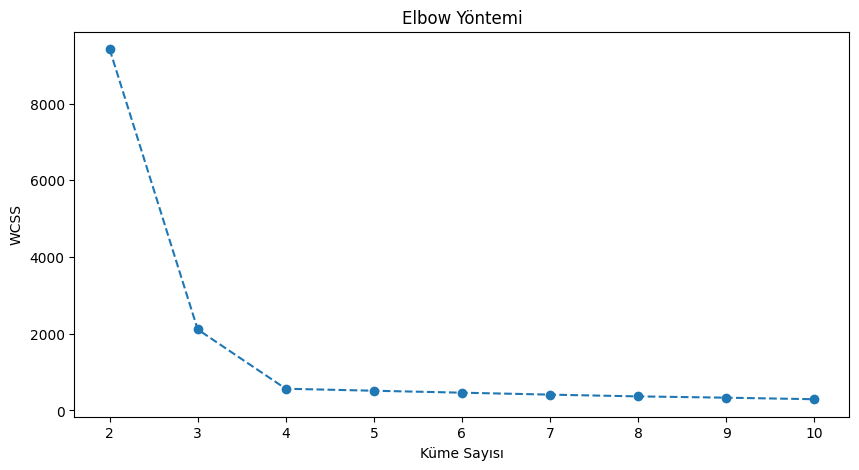

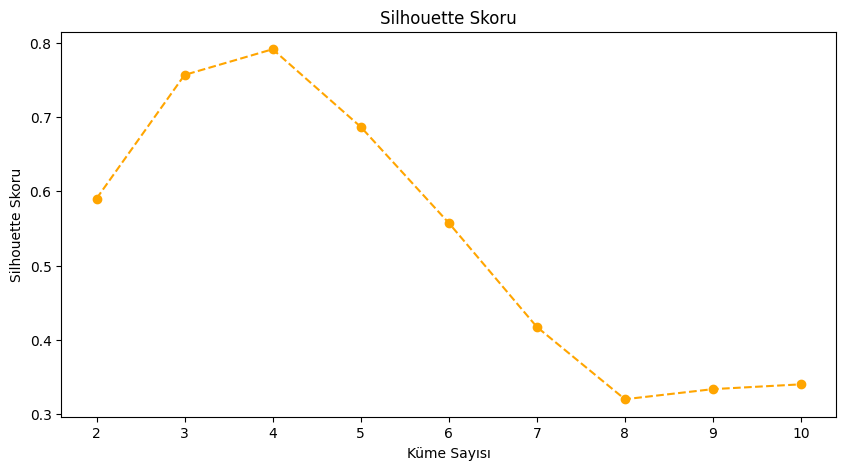

Optimal Küme Sayısı: 4
En Yüksek Silhouette Skoru: 0.7916


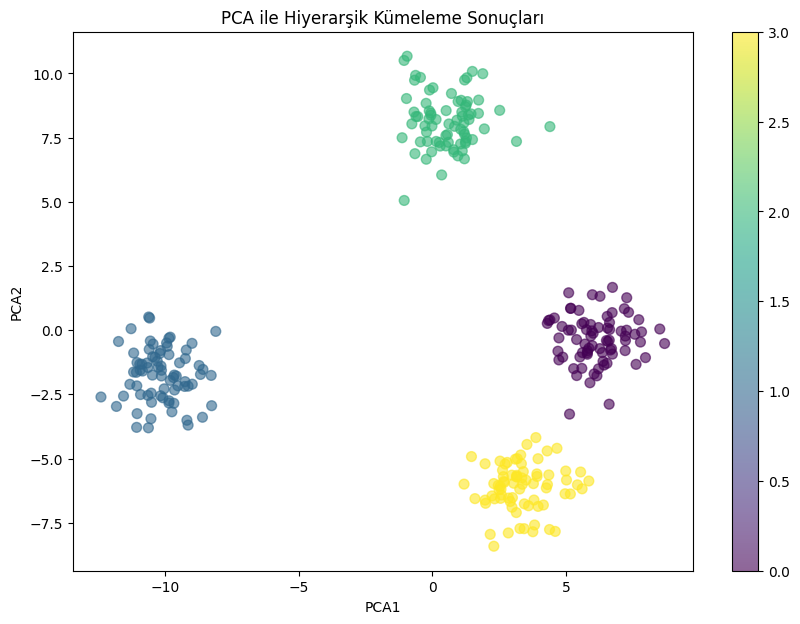

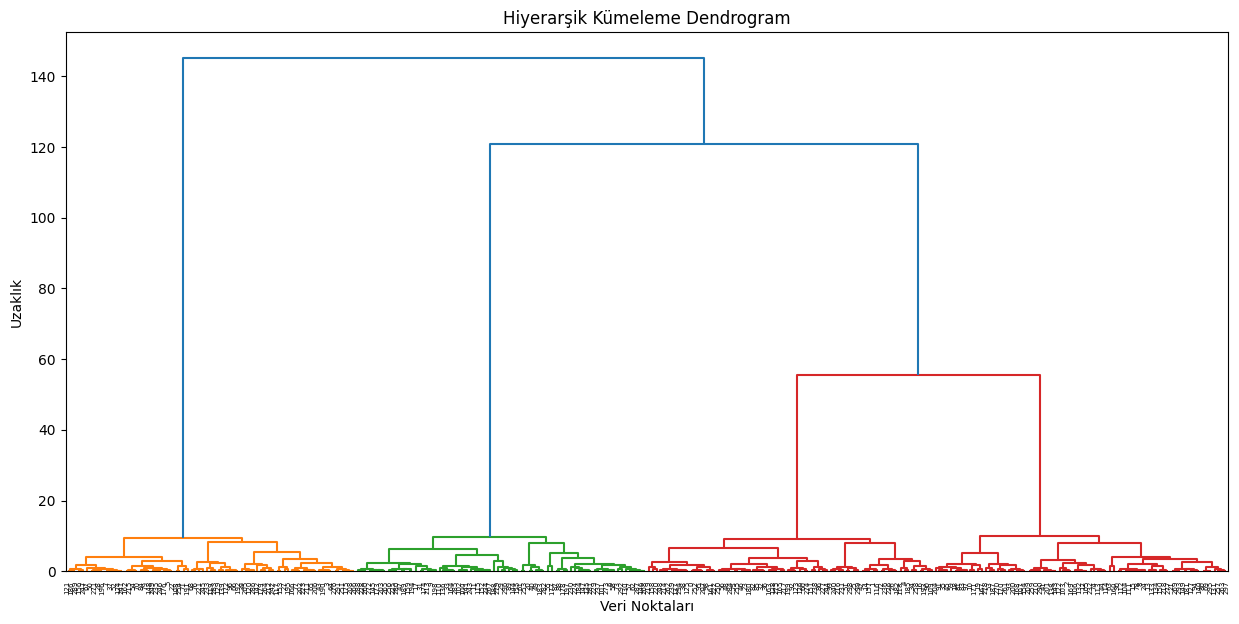

Optimal Küme Sayısı: 4, Silhouette Skoru: 0.7916


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

def train_evaluate_HierarchicalKMeans(X):
    # Elbow yöntemi ile optimum küme sayısını belirleme
    wcss = []
    range_clusters = range(2, 11)
    for k in range_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Elbow grafiği
    plt.figure(figsize=(10, 5))
    plt.plot(range_clusters, wcss, marker='o', linestyle='--')
    plt.title("Elbow Yöntemi")
    plt.xlabel("Küme Sayısı")
    plt.ylabel("WCSS")
    plt.show()

    # Silhouette Skoru Hesaplama
    silhouette_scores = []
    for k in range_clusters:
        clustering = AgglomerativeClustering(n_clusters=k)
        labels = clustering.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)

    # Silhouette Skoru grafiği
    plt.figure(figsize=(10, 5))
    plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='orange')
    plt.title("Silhouette Skoru")
    plt.xlabel("Küme Sayısı")
    plt.ylabel("Silhouette Skoru")
    plt.show()

    # En iyi küme sayısını seçme
    optimal_k = range_clusters[np.argmax(silhouette_scores)]
    print(f"Optimal Küme Sayısı: {optimal_k}")
    print(f"En Yüksek Silhouette Skoru: {max(silhouette_scores):.4f}")

    # Hiyerarşik Kümeleme Modeli ile Eğitim
    hierarchical_model = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
    cluster_labels = hierarchical_model.fit_predict(X)

    # PCA ile görselleştirme
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(10, 7))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.6)
    plt.title("PCA ile Hiyerarşik Kümeleme Sonuçları")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.colorbar()
    plt.show()

    # Dendrogram
    plt.figure(figsize=(15, 7))
    linkage_matrix = linkage(X, method='ward')
    dendrogram(linkage_matrix)
    plt.title("Hiyerarşik Kümeleme Dendrogram")
    plt.xlabel("Veri Noktaları")
    plt.ylabel("Uzaklık")
    plt.show()

    return optimal_k, max(silhouette_scores)

# Örnek Veri ile Çalıştırma
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

optimal_k, best_score = train_evaluate_HierarchicalKMeans(X)
print(f"Optimal Küme Sayısı: {optimal_k}, Silhouette Skoru: {best_score:.4f}")


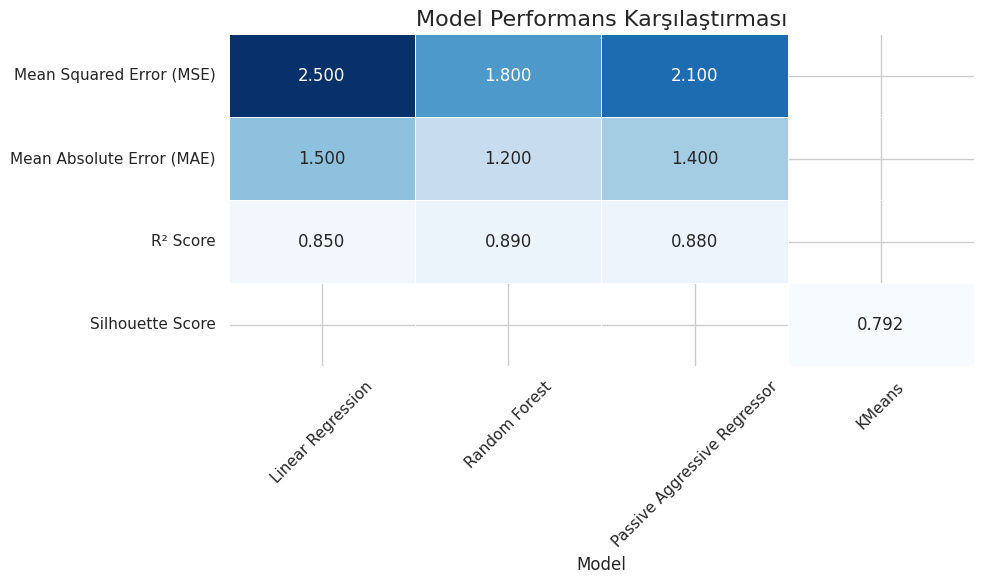

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

# Örnek veri seti
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# KMeans uygulaması
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
silhouette_kmeans = silhouette_score(X, kmeans.labels_)

# Diğer modellerin performans metrikleri
# Bu metrikleri daha önceki kodda hesapladığınızı varsayalım
# Örnek olarak:

mse_linear = 2.5  # Gerçek MSE değeri
mse_rf = 1.8      # Gerçek MSE değeri
mse_pa = 2.1      # Gerçek MSE değeri

mae_linear = 1.5  # Gerçek MAE değeri
mae_rf = 1.2      # Gerçek MAE değeri
mae_pa = 1.4      # Gerçek MAE değeri

r2_linear = 0.85  # Gerçek R² değeri
r2_rf = 0.89      # Gerçek R² değeri
r2_pa = 0.88      # Gerçek R² değeri

# Model performans metriklerini içeren bir sözlük oluşturuyoruz
model_performance = {
    "Model": ["Linear Regression", "Random Forest", "Passive Aggressive Regressor", "KMeans"],
    "Mean Squared Error (MSE)": [mse_linear, mse_rf, mse_pa, None],  # KMeans için MSE uygulanmaz, None
    "Mean Absolute Error (MAE)": [mae_linear, mae_rf, mae_pa, None],  # KMeans için MAE uygulanmaz, None
    "R² Score": [r2_linear, r2_rf, r2_pa, None],  # KMeans için R² uygulanmaz, None
    "Silhouette Score": [None, None, None, silhouette_kmeans]  # KMeans için Silhouette skoru
}

# Pandas DataFrame'e dönüştür
performance_df = pd.DataFrame(model_performance)

# DataFrame'i transpoz (ters) ediyoruz, böylece metrikler sütunlarda, modeller ise satırlarda olacak
performance_df = performance_df.set_index("Model").T

# Görselleştirme için stil ayarları
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Tabloyu oluşturuyoruz
ax = sns.heatmap(performance_df, annot=True, cmap="Blues", fmt=".3f", cbar=False, linewidths=0.5)

# Başlık ve eksen ayarları
plt.title("Model Performans Karşılaştırması", fontsize=16)
plt.yticks(rotation=0)
plt.xticks(rotation=45)

# Tabloyu görsel olarak kaydediyoruz
plt.tight_layout()
plt.show()
